# Data preparation

This notebook contains code that is used to prepare the eICU data before startign the standardisation process

## Vitals

### Temperature

#### Breakdown vitals in to smaller pieces

In [1]:
import os


os.system(
    'cd ' + os.environ['EICU_EHR_PIPELINE_BASE'] + '''/data/eICU;'''
    +
    '''echo "vitalperiodicid,patientunitstayid,observationoffset,vitalname,value" > vitals_temperature.csv;'''
    +
    '''awk -F, 'NR>1 {print $1 "," $2 "," $3 ",temperature," $4}' vitalPeriodic.csv >> vitals_temperature.csv;'''
    )


0

#### Create daily aggregates

In [2]:
import os
import pandas as pd

vitalsDf = pd.read_csv(os.environ['EICU_EHR_PIPELINE_BASE'] + '''/data/eICU/vitals_temperature.csv''')
vitalsDf

,vitalperiodicid,patientunitstayid,observationoffset,vitalname,value
0,37376747,141168,2059,temperature,NaN
1,37404957,141168,1289,temperature,NaN
2,37385871,141168,1794,temperature,NaN
3,37401664,141168,1374,temperature,NaN
4,37377404,141168,2039,temperature,NaN
...,...,...,...,...,...
146671637,2169559983,3353263,504,temperature,NaN
146671638,2169559616,3353263,534,temperature,NaN
146671639,2169559436,3353263,549,temperature,NaN
146671640,2169559494,3353263,544,temperature,NaN


<Axes: xlabel='value', ylabel='Density'>

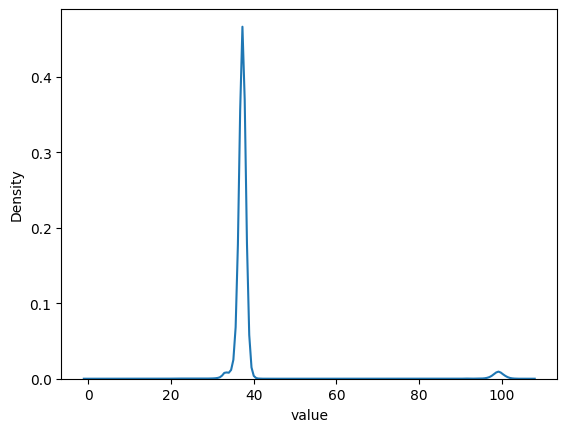

In [4]:
import seaborn as sns


sns.kdeplot(vitalsDf[vitalsDf.value > 0], x="value")

In [5]:
vitalsDf['value'] = vitalsDf.value.apply(lambda x: ((x-32) * (5/9)) if(x>50) else x)

<Axes: xlabel='value', ylabel='Density'>

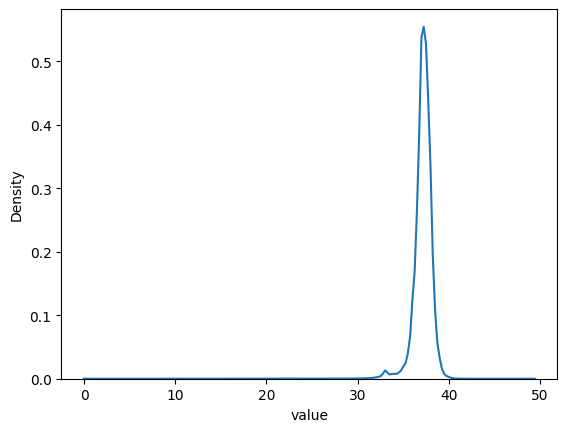

In [6]:
import seaborn as sns


sns.kdeplot(vitalsDf[vitalsDf.value > 0], x="value")

In [7]:
import numpy as np


vitalsDf['observationday'] = np.floor(vitalsDf.observationoffset/(60*24))

In [8]:
vitalsAggDf = vitalsDf[['patientunitstayid', 'observationday', 'value']].groupby(['patientunitstayid', 'observationday'], as_index=False).agg(['mean', 'min', 'max', 'std'])

In [9]:
vitalsFirstDf = vitalsDf.sort_values(['patientunitstayid', 'observationday', 'observationoffset'], ascending=True)[['patientunitstayid', 'observationday', 'value']].groupby(['patientunitstayid', 'observationday']).first()

In [10]:
vitalsLastDf = vitalsDf.sort_values(['patientunitstayid', 'observationday', 'observationoffset'], ascending=False)[['patientunitstayid', 'observationday', 'value']].groupby(['patientunitstayid', 'observationday']).first()

In [11]:
vitalsAggDf.columns = vitalsAggDf.columns.droplevel()

In [12]:
vitalsAggDf = vitalsAggDf.reset_index()

In [13]:
vitalsFirstDf = vitalsFirstDf.reset_index()
vitalsFirstDf.columns = ['patientunitstayid', 'observationday', 'first']

In [14]:
vitalsLastDf = vitalsLastDf.reset_index()
vitalsLastDf.columns = ['patientunitstayid', 'observationday', 'last']

In [15]:
vitalsFinalDf = vitalsAggDf.merge(vitalsFirstDf, on=['patientunitstayid', 'observationday']).merge(vitalsLastDf, on=['patientunitstayid', 'observationday'])

In [16]:
vitalsFinalDf.to_csv(os.environ['EICU_EHR_PIPELINE_BASE'] + '''/data/eICU/vitals_temperature_agg.csv''', index=False)

### sao2

In [13]:
import os
import numpy as np
import pandas as pd


os.system(
    'cd ' + os.environ['EICU_EHR_PIPELINE_BASE'] + '''/data/eICU;'''
    +
    '''echo "vitalperiodicid,patientunitstayid,observationoffset,vitalname,value" > vitals_sao2.csv;'''
    +
    '''awk -F, 'NR>1 {print $1 "," $2 "," $3 ",sa02," $5}' vitalPeriodic.csv >> vitals_sao2.csv;'''
    )

vitalsDf = pd.read_csv(os.environ['EICU_EHR_PIPELINE_BASE'] + '''/data/eICU/vitals_sao2.csv''')

vitalsDf['observationday'] = np.floor(vitalsDf.observationoffset/(60*24))

vitalsAggDf = vitalsDf[['patientunitstayid', 'observationday', 'value']].groupby(['patientunitstayid', 'observationday'], as_index=False).agg(['mean', 'min', 'max', 'std'])

vitalsFirstDf = vitalsDf.sort_values(['patientunitstayid', 'observationday', 'observationoffset'], ascending=True)[['patientunitstayid', 'observationday', 'value']].groupby(['patientunitstayid', 'observationday']).first()

vitalsLastDf = vitalsDf.sort_values(['patientunitstayid', 'observationday', 'observationoffset'], ascending=False)[['patientunitstayid', 'observationday', 'value']].groupby(['patientunitstayid', 'observationday']).first()

vitalsAggDf.columns = vitalsAggDf.columns.droplevel()

vitalsAggDf = vitalsAggDf.reset_index()

vitalsFirstDf = vitalsFirstDf.reset_index()
vitalsFirstDf.columns = ['patientunitstayid', 'observationday', 'first']

vitalsLastDf = vitalsLastDf.reset_index()
vitalsLastDf.columns = ['patientunitstayid', 'observationday', 'last']

vitalsFinalDf = vitalsAggDf.merge(vitalsFirstDf, on=['patientunitstayid', 'observationday']).merge(vitalsLastDf, on=['patientunitstayid', 'observationday'])

vitalsFinalDf.to_csv(os.environ['EICU_EHR_PIPELINE_BASE'] + '''/data/eICU/vitals_sao2_agg.csv''', index=False)

### Heartrate

In [1]:
import os
import numpy as np
import pandas as pd


os.system(
    'cd ' + os.environ['EICU_EHR_PIPELINE_BASE'] + '''/data/eICU;'''
    +
    '''echo "vitalperiodicid,patientunitstayid,observationoffset,vitalname,value" > vitals_heartrate.csv;'''
    +
    '''awk -F, 'NR>1 {print $1 "," $2 "," $3 ",sa02," $6}' vitalPeriodic.csv >> vitals_heartrate.csv;'''
    )

vitalsDf = pd.read_csv(os.environ['EICU_EHR_PIPELINE_BASE'] + '''/data/eICU/vitals_heartrate.csv''')

vitalsDf['observationday'] = np.floor(vitalsDf.observationoffset/(60*24))

vitalsAggDf = vitalsDf[['patientunitstayid', 'observationday', 'value']].groupby(['patientunitstayid', 'observationday'], as_index=False).agg(['mean', 'min', 'max', 'std'])

vitalsFirstDf = vitalsDf.sort_values(['patientunitstayid', 'observationday', 'observationoffset'], ascending=True)[['patientunitstayid', 'observationday', 'value']].groupby(['patientunitstayid', 'observationday']).first()

vitalsLastDf = vitalsDf.sort_values(['patientunitstayid', 'observationday', 'observationoffset'], ascending=False)[['patientunitstayid', 'observationday', 'value']].groupby(['patientunitstayid', 'observationday']).first()

vitalsAggDf.columns = vitalsAggDf.columns.droplevel()

vitalsAggDf = vitalsAggDf.reset_index()

vitalsFirstDf = vitalsFirstDf.reset_index()
vitalsFirstDf.columns = ['patientunitstayid', 'observationday', 'first']

vitalsLastDf = vitalsLastDf.reset_index()
vitalsLastDf.columns = ['patientunitstayid', 'observationday', 'last']

vitalsFinalDf = vitalsAggDf.merge(vitalsFirstDf, on=['patientunitstayid', 'observationday']).merge(vitalsLastDf, on=['patientunitstayid', 'observationday'])

vitalsFinalDf.to_csv(os.environ['EICU_EHR_PIPELINE_BASE'] + '''/data/eICU/vitals_heartrate_agg.csv''', index=False)

### Respiration

In [ ]:
import os
import numpy as np
import pandas as pd


os.system(
    'cd ' + os.environ['EICU_EHR_PIPELINE_BASE'] + '''/data/eICU;'''
    +
    '''echo "vitalperiodicid,patientunitstayid,observationoffset,vitalname,value" > vitals_respiration.csv;'''
    +
    '''awk -F, 'NR>1 {print $1 "," $2 "," $3 ",sa02," $7}' vitalPeriodic.csv >> vitals_respiration.csv;'''
    )

vitalsDf = pd.read_csv(os.environ['EICU_EHR_PIPELINE_BASE'] + '''/data/eICU/vitals_respiration.csv''')

vitalsDf['observationday'] = np.floor(vitalsDf.observationoffset/(60*24))

vitalsAggDf = vitalsDf[['patientunitstayid', 'observationday', 'value']].groupby(['patientunitstayid', 'observationday'], as_index=False).agg(['mean', 'min', 'max', 'std'])

vitalsFirstDf = vitalsDf.sort_values(['patientunitstayid', 'observationday', 'observationoffset'], ascending=True)[['patientunitstayid', 'observationday', 'value']].groupby(['patientunitstayid', 'observationday']).first()

vitalsLastDf = vitalsDf.sort_values(['patientunitstayid', 'observationday', 'observationoffset'], ascending=False)[['patientunitstayid', 'observationday', 'value']].groupby(['patientunitstayid', 'observationday']).first()

vitalsAggDf.columns = vitalsAggDf.columns.droplevel()

vitalsAggDf = vitalsAggDf.reset_index()

vitalsFirstDf = vitalsFirstDf.reset_index()
vitalsFirstDf.columns = ['patientunitstayid', 'observationday', 'first']

vitalsLastDf = vitalsLastDf.reset_index()
vitalsLastDf.columns = ['patientunitstayid', 'observationday', 'last']

vitalsFinalDf = vitalsAggDf.merge(vitalsFirstDf, on=['patientunitstayid', 'observationday']).merge(vitalsLastDf, on=['patientunitstayid', 'observationday'])

vitalsFinalDf.to_csv(os.environ['EICU_EHR_PIPELINE_BASE'] + '''/data/eICU/vitals_respiration_agg.csv''', index=False)

### SystemicSystolic

In [ ]:
import os
import numpy as np
import pandas as pd


os.system(
    'cd ' + os.environ['EICU_EHR_PIPELINE_BASE'] + '''/data/eICU;'''
    +
    '''echo "vitalperiodicid,patientunitstayid,observationoffset,vitalname,value" > vitals_systemic_systolic.csv;'''
    +
    '''awk -F, 'NR>1 {print $1 "," $2 "," $3 ",sa02," $10}' vitalPeriodic.csv >> vitals_systemic_systolic.csv;'''
    )

vitalsDf = pd.read_csv(os.environ['EICU_EHR_PIPELINE_BASE'] + '''/data/eICU/vitals_systemic_systolic.csv''')

vitalsDf['observationday'] = np.floor(vitalsDf.observationoffset/(60*24))

vitalsAggDf = vitalsDf[['patientunitstayid', 'observationday', 'value']].groupby(['patientunitstayid', 'observationday'], as_index=False).agg(['mean', 'min', 'max', 'std'])

vitalsFirstDf = vitalsDf.sort_values(['patientunitstayid', 'observationday', 'observationoffset'], ascending=True)[['patientunitstayid', 'observationday', 'value']].groupby(['patientunitstayid', 'observationday']).first()

vitalsLastDf = vitalsDf.sort_values(['patientunitstayid', 'observationday', 'observationoffset'], ascending=False)[['patientunitstayid', 'observationday', 'value']].groupby(['patientunitstayid', 'observationday']).first()

vitalsAggDf.columns = vitalsAggDf.columns.droplevel()

vitalsAggDf = vitalsAggDf.reset_index()

vitalsFirstDf = vitalsFirstDf.reset_index()
vitalsFirstDf.columns = ['patientunitstayid', 'observationday', 'first']

vitalsLastDf = vitalsLastDf.reset_index()
vitalsLastDf.columns = ['patientunitstayid', 'observationday', 'last']

vitalsFinalDf = vitalsAggDf.merge(vitalsFirstDf, on=['patientunitstayid', 'observationday']).merge(vitalsLastDf, on=['patientunitstayid', 'observationday'])

vitalsFinalDf.to_csv(os.environ['EICU_EHR_PIPELINE_BASE'] + '''/data/eICU/vitals_systemic_systolic_agg.csv''', index=False)

### SystemicDiastolic

In [ ]:
import os
import numpy as np
import pandas as pd


os.system(
    'cd ' + os.environ['EICU_EHR_PIPELINE_BASE'] + '''/data/eICU;'''
    +
    '''echo "vitalperiodicid,patientunitstayid,observationoffset,vitalname,value" > vitals_systemic_diastolic.csv;'''
    +
    '''awk -F, 'NR>1 {print $1 "," $2 "," $3 ",sa02," $11}' vitalPeriodic.csv >> vitals_systemic_diastolic.csv;'''
    )

vitalsDf = pd.read_csv(os.environ['EICU_EHR_PIPELINE_BASE'] + '''/data/eICU/vitals_systemic_diastolic.csv''')

vitalsDf['observationday'] = np.floor(vitalsDf.observationoffset/(60*24))

vitalsAggDf = vitalsDf[['patientunitstayid', 'observationday', 'value']].groupby(['patientunitstayid', 'observationday'], as_index=False).agg(['mean', 'min', 'max', 'std'])

vitalsFirstDf = vitalsDf.sort_values(['patientunitstayid', 'observationday', 'observationoffset'], ascending=True)[['patientunitstayid', 'observationday', 'value']].groupby(['patientunitstayid', 'observationday']).first()

vitalsLastDf = vitalsDf.sort_values(['patientunitstayid', 'observationday', 'observationoffset'], ascending=False)[['patientunitstayid', 'observationday', 'value']].groupby(['patientunitstayid', 'observationday']).first()

vitalsAggDf.columns = vitalsAggDf.columns.droplevel()

vitalsAggDf = vitalsAggDf.reset_index()

vitalsFirstDf = vitalsFirstDf.reset_index()
vitalsFirstDf.columns = ['patientunitstayid', 'observationday', 'first']

vitalsLastDf = vitalsLastDf.reset_index()
vitalsLastDf.columns = ['patientunitstayid', 'observationday', 'last']

vitalsFinalDf = vitalsAggDf.merge(vitalsFirstDf, on=['patientunitstayid', 'observationday']).merge(vitalsLastDf, on=['patientunitstayid', 'observationday'])

vitalsFinalDf.to_csv(os.environ['EICU_EHR_PIPELINE_BASE'] + '''/data/eICU/vitals_systemic_diastolic_agg.csv''', index=False)

### SystemicMean

In [ ]:
import os
import numpy as np
import pandas as pd


os.system(
    'cd ' + os.environ['EICU_EHR_PIPELINE_BASE'] + '''/data/eICU;'''
    +
    '''echo "vitalperiodicid,patientunitstayid,observationoffset,vitalname,value" > vitals_systemic_mean.csv;'''
    +
    '''awk -F, 'NR>1 {print $1 "," $2 "," $3 ",sa02," $12}' vitalPeriodic.csv >> vitals_systemic_mean.csv;'''
    )

vitalsDf = pd.read_csv(os.environ['EICU_EHR_PIPELINE_BASE'] + '''/data/eICU/vitals_systemic_mean.csv''')

vitalsDf['observationday'] = np.floor(vitalsDf.observationoffset/(60*24))

vitalsAggDf = vitalsDf[['patientunitstayid', 'observationday', 'value']].groupby(['patientunitstayid', 'observationday'], as_index=False).agg(['mean', 'min', 'max', 'std'])

vitalsFirstDf = vitalsDf.sort_values(['patientunitstayid', 'observationday', 'observationoffset'], ascending=True)[['patientunitstayid', 'observationday', 'value']].groupby(['patientunitstayid', 'observationday']).first()

vitalsLastDf = vitalsDf.sort_values(['patientunitstayid', 'observationday', 'observationoffset'], ascending=False)[['patientunitstayid', 'observationday', 'value']].groupby(['patientunitstayid', 'observationday']).first()

vitalsAggDf.columns = vitalsAggDf.columns.droplevel()

vitalsAggDf = vitalsAggDf.reset_index()

vitalsFirstDf = vitalsFirstDf.reset_index()
vitalsFirstDf.columns = ['patientunitstayid', 'observationday', 'first']

vitalsLastDf = vitalsLastDf.reset_index()
vitalsLastDf.columns = ['patientunitstayid', 'observationday', 'last']

vitalsFinalDf = vitalsAggDf.merge(vitalsFirstDf, on=['patientunitstayid', 'observationday']).merge(vitalsLastDf, on=['patientunitstayid', 'observationday'])

vitalsFinalDf.to_csv(os.environ['EICU_EHR_PIPELINE_BASE'] + '''/data/eICU/vitals_systemic_mean_agg.csv''', index=False)

## Read aggregated files

### Read files

In [12]:
import os
import pandas as pd


vitalsTemperature = pd.read_csv(os.environ['EICU_EHR_PIPELINE_BASE'] + '''/data/eICU/vitals_temperature_agg.csv''')
vitalsTemperature.columns = ["patientunitstayid", "observationday", "mean_temperature", "min_temperature", "max_temperature", "std_temperature", "first_temperature", "last_temperature"]
vitalsSao2 = pd.read_csv(os.environ['EICU_EHR_PIPELINE_BASE'] + '''/data/eICU/vitals_sao2_agg.csv''')
vitalsSao2.columns = ["patientunitstayid", "observationday", "mean_sao2", "min_sao2", "max_sao2", "std_sao2", "first_sao2", "last_sao2"]
vitalsHeartrate = pd.read_csv(os.environ['EICU_EHR_PIPELINE_BASE'] + '''/data/eICU/vitals_heartrate_agg.csv''')
vitalsHeartrate.columns = ["patientunitstayid", "observationday", "mean_heartrate", "min_heartrate", "max_heartrate", "std_heartrate", "first_heartrate", "last_heartrate"]
vitalsRespiration = pd.read_csv(os.environ['EICU_EHR_PIPELINE_BASE'] + '''/data/eICU/vitals_respiration_agg.csv''')
vitalsRespiration.columns = ["patientunitstayid", "observationday", "mean_respiration", "min_respiration", "max_respiration", "std_respiration", "first_respiration", "last_respiration"]
vitalsSystemicSystolic = pd.read_csv(os.environ['EICU_EHR_PIPELINE_BASE'] + '''/data/eICU/vitals_systemic_systolic_agg.csv''')
vitalsSystemicSystolic.columns = ["patientunitstayid", "observationday", "mean_systemic_systolic", "min_systemic_systolic", "max_systemic_systolic", "std_systemic_systolic", "first_systemic_systolic", "last_systemic_systolic"]
vitalsSystemicDiastolic = pd.read_csv(os.environ['EICU_EHR_PIPELINE_BASE'] + '''/data/eICU/vitals_systemic_diastolic_agg.csv''')
vitalsSystemicDiastolic.columns = ["patientunitstayid", "observationday", "mean_systemic_diastolic", "min_systemic_diastolic", "max_systemic_diastolic", "std_systemic_diastolic", "first_systemic_diastolic", "last_systemic_diastolic"]
vitalsSystemicMean = pd.read_csv(os.environ['EICU_EHR_PIPELINE_BASE'] + '''/data/eICU/vitals_systemic_mean_agg.csv''')
vitalsSystemicMean.columns = ["patientunitstayid", "observationday", "mean_systemic_mean", "min_systemic_mean", "max_systemic_mean", "std_systemic_mean", "first_systemic_mean", "last_systemic_mean"]

### Merge data

In [13]:
vitalsDf = vitalsSystemicMean\
    .merge(vitalsSystemicDiastolic, on=['patientunitstayid', 'observationday'])\
    .merge(vitalsSystemicSystolic, on=['patientunitstayid', 'observationday'])\
    .merge(vitalsRespiration, on=['patientunitstayid', 'observationday'])\
    .merge(vitalsHeartrate, on=['patientunitstayid', 'observationday'])\
    .merge(vitalsSao2, on=['patientunitstayid', 'observationday'])\
    .merge(vitalsTemperature, on=['patientunitstayid', 'observationday'])
vitalsDf

,patientunitstayid,observationday,mean_systemic_mean,min_systemic_mean,max_systemic_mean,std_systemic_mean,first_systemic_mean,last_systemic_mean,mean_systemic_diastolic,min_systemic_diastolic,...,max_sao2,std_sao2,first_sao2,last_sao2,mean_temperature,min_temperature,max_temperature,std_temperature,first_temperature,last_temperature
0,141168,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,99.0,10.388993,93.0,93.0,NaN,NaN,NaN,NaN,NaN,NaN
1,141168,1.0,70.585366,28.0,159.0,23.523367,28.0,70.0,51.0,17.0,...,100.0,14.387726,94.0,97.0,NaN,NaN,NaN,NaN,NaN,NaN
2,141178,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,92.0,NaN,92.0,92.0,NaN,NaN,NaN,NaN,NaN,NaN
3,141179,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,100.0,1.539072,93.0,96.0,NaN,NaN,NaN,NaN,NaN,NaN
4,141179,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,96.0,NaN,96.0,96.0,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
623490,3353251,9.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,99.0,1.159588,97.0,92.0,NaN,NaN,NaN,NaN,NaN,NaN
623491,3353251,10.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,99.0,2.589867,97.0,98.0,NaN,NaN,NaN,NaN,NaN,NaN
623492,3353251,11.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,100.0,9.032632,99.0,96.0,NaN,NaN,NaN,NaN,NaN,NaN
623493,3353254,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,100.0,1.994938,95.0,98.0,NaN,NaN,NaN,NaN,NaN,NaN


### Save formatted files

In [14]:
vitalsDf.columns

Index(['patientunitstayid', 'observationday', 'mean_systemic_mean',
       'min_systemic_mean', 'max_systemic_mean', 'std_systemic_mean',
       'first_systemic_mean', 'last_systemic_mean', 'mean_systemic_diastolic',
       'min_systemic_diastolic', 'max_systemic_diastolic',
       'std_systemic_diastolic', 'first_systemic_diastolic',
       'last_systemic_diastolic', 'mean_systemic_systolic',
       'min_systemic_systolic', 'max_systemic_systolic',
       'std_systemic_systolic', 'first_systemic_systolic',
       'last_systemic_systolic', 'mean_respiration', 'min_respiration',
       'max_respiration', 'std_respiration', 'first_respiration',
       'last_respiration', 'mean_heartrate', 'min_heartrate', 'max_heartrate',
       'std_heartrate', 'first_heartrate', 'last_heartrate', 'mean_sao2',
       'min_sao2', 'max_sao2', 'std_sao2', 'first_sao2', 'last_sao2',
       'mean_temperature', 'min_temperature', 'max_temperature',
       'std_temperature', 'first_temperature', 'last_temperat

#### Mean per episode and date

In [23]:
import os


vitalsMeanDf = vitalsDf[['patientunitstayid', 'observationday', 'mean_systemic_mean', 'mean_systemic_diastolic', 'mean_systemic_systolic', 'mean_respiration', 'mean_heartrate', 'mean_sao2', 'mean_temperature']]
vitalsMeanDf.columns = ['patientunitstayid', 'observationday', 'systemic_mean', 'systemic_diastolic', 'systemic_systolic', 'respiration', 'heartrate', 'sao2', 'temperature']
vitalsMeanDf.to_csv(os.environ['EICU_EHR_PIPELINE_BASE'] + '''/data/extracts/vitals_avg_episode_date.csv''', index=False)

#### Min per episode and date

In [18]:
import os


vitalsMinDf = vitalsDf[['patientunitstayid', 'observationday', 'min_systemic_mean', 'min_systemic_diastolic', 'min_systemic_systolic', 'min_respiration', 'min_heartrate', 'min_sao2', 'min_temperature']]
vitalsMinDf.columns = ['patientunitstayid', 'observationday', 'systemic_mean', 'systemic_diastolic', 'systemic_systolic', 'respiration', 'heartrate', 'sao2', 'temperature']
vitalsMinDf.to_csv(os.environ['EICU_EHR_PIPELINE_BASE'] + '''/data/extracts/vitals_min_episode_date.csv''', index=False)

#### Max per episode and date

In [19]:
import os


vitalsMaxDf = vitalsDf[['patientunitstayid', 'observationday', 'max_systemic_mean', 'max_systemic_diastolic', 'max_systemic_systolic', 'max_respiration', 'max_heartrate', 'max_sao2', 'max_temperature']]
vitalsMaxDf.columns = ['patientunitstayid', 'observationday', 'systemic_mean', 'systemic_diastolic', 'systemic_systolic', 'respiration', 'heartrate', 'sao2', 'temperature']
vitalsMaxDf.to_csv(os.environ['EICU_EHR_PIPELINE_BASE'] + '''/data/extracts/vitals_max_episode_date.csv''', index=False)

#### Stddev per episode and date

In [24]:
import os


vitalsStdDf = vitalsDf[['patientunitstayid', 'observationday', 'std_systemic_mean', 'std_systemic_diastolic', 'std_systemic_systolic', 'std_respiration', 'std_heartrate', 'std_sao2', 'std_temperature']]
vitalsStdDf.columns = ['patientunitstayid', 'observationday', 'systemic_mean', 'systemic_diastolic', 'systemic_systolic', 'respiration', 'heartrate', 'sao2', 'temperature']
vitalsStdDf.to_csv(os.environ['EICU_EHR_PIPELINE_BASE'] + '''/data/extracts/vitals_stddev_episode_date.csv''', index=False)

#### First per episode and date

In [21]:
import os


vitalsFirstDf = vitalsDf[['patientunitstayid', 'observationday', 'first_systemic_mean', 'first_systemic_diastolic', 'first_systemic_systolic', 'first_respiration', 'first_heartrate', 'first_sao2', 'first_temperature']]
vitalsFirstDf.columns = ['patientunitstayid', 'observationday', 'systemic_mean', 'systemic_diastolic', 'systemic_systolic', 'respiration', 'heartrate', 'sao2', 'temperature']
vitalsFirstDf.to_csv(os.environ['EICU_EHR_PIPELINE_BASE'] + '''/data/extracts/vitals_first_episode_date.csv''', index=False)

#### Last per episode and date

In [22]:
import os


vitalsLastDf = vitalsDf[['patientunitstayid', 'observationday', 'last_systemic_mean', 'last_systemic_diastolic', 'last_systemic_systolic', 'last_respiration', 'last_heartrate', 'last_sao2', 'last_temperature']]
vitalsLastDf.columns = ['patientunitstayid', 'observationday', 'systemic_mean', 'systemic_diastolic', 'systemic_systolic', 'respiration', 'heartrate', 'sao2', 'temperature']
vitalsLastDf.to_csv(os.environ['EICU_EHR_PIPELINE_BASE'] + '''/data/extracts/vitals_last_episode_date.csv''', index=False)